<a href="https://colab.research.google.com/github/haseeb1zahid/Deep-Learning-Projects/blob/master/Convolutional%20AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.1211 - val_loss: 0.1158
Epoch 2/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1187 - val_loss: 0.1149
Epoch 3/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.1163 - val_loss: 0.1148
Epoch 4/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1148 - val_loss: 0.1159
Epoch 5/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1131 - val_loss: 0.1096
Epoch 6/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.1120 - val_loss: 0.1095
Epoch 7/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1107 - val_loss: 0.1118
Epoch 8/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1095 - val_loss: 0.1109
Epoch 9/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1087 - val_loss: 0.1

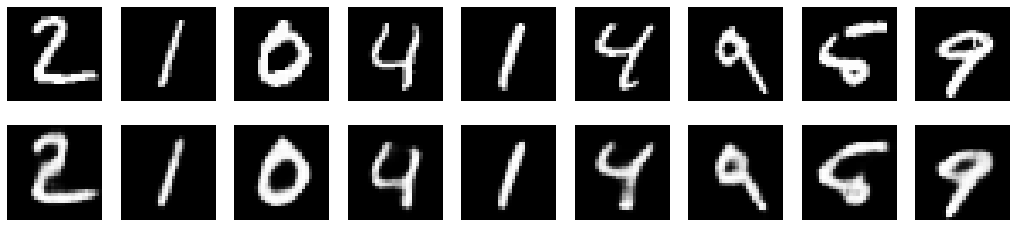

In [6]:
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()